<a href="https://colab.research.google.com/github/JermanJr/TechChallenge_md3_4_gr14/blob/main/Se%CC%81rie_temporal_para_previsa%CC%83o_na_bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 2 - Machine Learning and Time Series

## O Problema

Realizar um modelo preditivo com dados da IBOVESPA (Bolsa de Valores) para criar uma série temporal e prever diariamente o fechamento da base

Utilizar a base de dados do site da Investing (https://br.investing.com/indices/bovespa-historical-dataz) e selecionar o período diário com o intervalo de tempo que achar adequado.

Demonstrar ao time de investimentos para o qual fui escalado:
1. O modelo com storytelling (desde a captura do dado até a entrega do modelo)
2. Justificar a técnica utilizada
3. Atingir uma acuracidade adequada (acima de 70%)

DICA: Utilizar o maior intervalo de tempo possível para atingir maior acuracidade no modelo preditivo.

In [510]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8
from pandas_datareader import data as wb
# !pip install pmdarima
# !pip install statsforecast
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

import pmdarima as pm

In [587]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [660]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados_challenger_3e4_seriesTemp/Dados Históricos - Ibovespa.csv',sep=',')
data.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.08.2023,118.404,118.051,118.493,117.400,"9,63M","1,10%"
1,28.08.2023,117.121,115.838,117.253,115.836,"9,60M","1,11%"
2,25.08.2023,115.837,117.025,117.252,115.397,"9,21M","-1,02%"
3,24.08.2023,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
4,23.08.2023,118.135,116.160,118.135,116.159,"11,54M","1,70%"


In [661]:
data['Data'] = data['Data'].apply(lambda x: str(x).replace('.','-'))

data['ano'] = data['Data'].apply(lambda x: str(x)[6:10])
data['mes'] = data['Data'].apply(lambda x: str(x)[3:5])
data['dia'] = data['Data'].apply(lambda x: str(x)[0:2])

data['ano'] = data['ano'].astype(int)
data['mes'] = data['mes'].astype(int)
data['dia'] = data['dia'].astype(int)

data['data'] = data['ano'].map(str) + '-' + data['mes'].map(str) + '-' + data['dia'].map(str)
data['data'] = pd.to_datetime(data['data'])
data = data.rename(columns={'data': 'Date', 'Último':'fechamento'})
data = data[['Date','fechamento']]
data = data.sort_values(by='Date',ascending=True)
data = data.set_index('Date')

data.head()

,fechamento
Date,
2013-01-02,62.550
2013-01-03,63.312
2013-01-04,62.523
2013-01-07,61.933
2013-01-08,61.128


In [662]:
print(data.dtypes)

fechamento    float64
dtype: object


In [663]:
data.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-21',
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-28', '2023-08-29'],
              dtype='datetime64[ns]', name='Date', length=2642, freq=None)

In [664]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

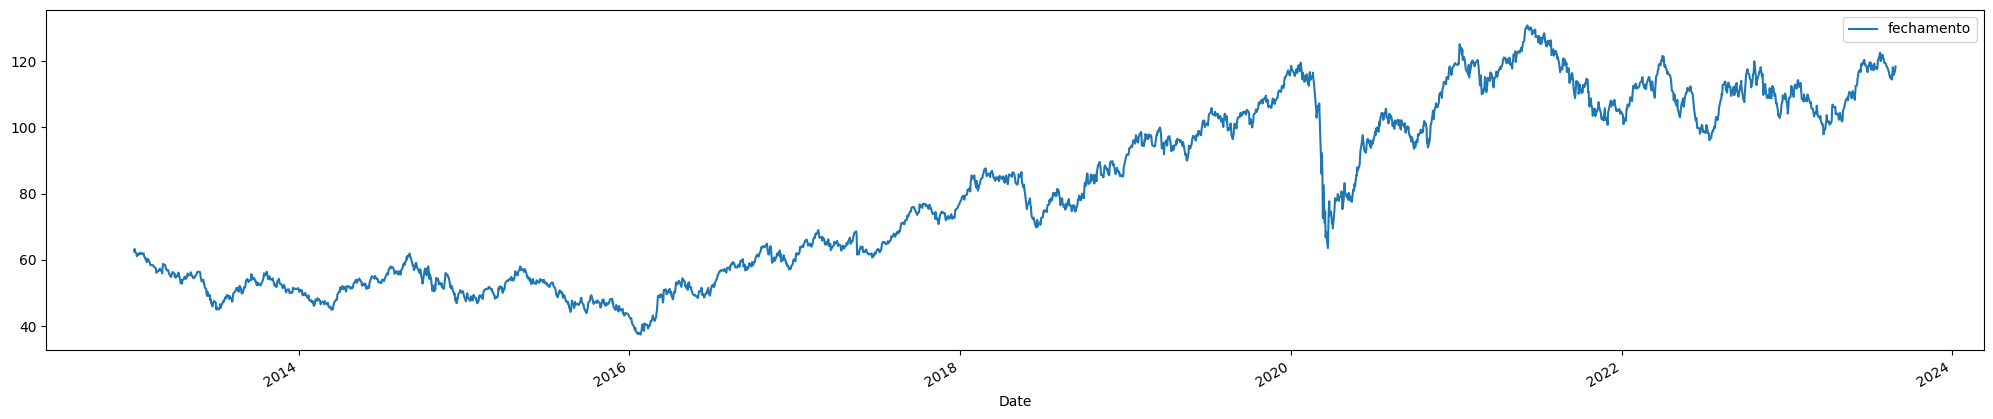

In [665]:
data.plot(figsize=(25, 5))
plt.show



In [666]:
data1 = data["fechamento"].resample("30D").apply([np.mean])

Text(0, 0.5, 'Média de Pontos da Bolsa')

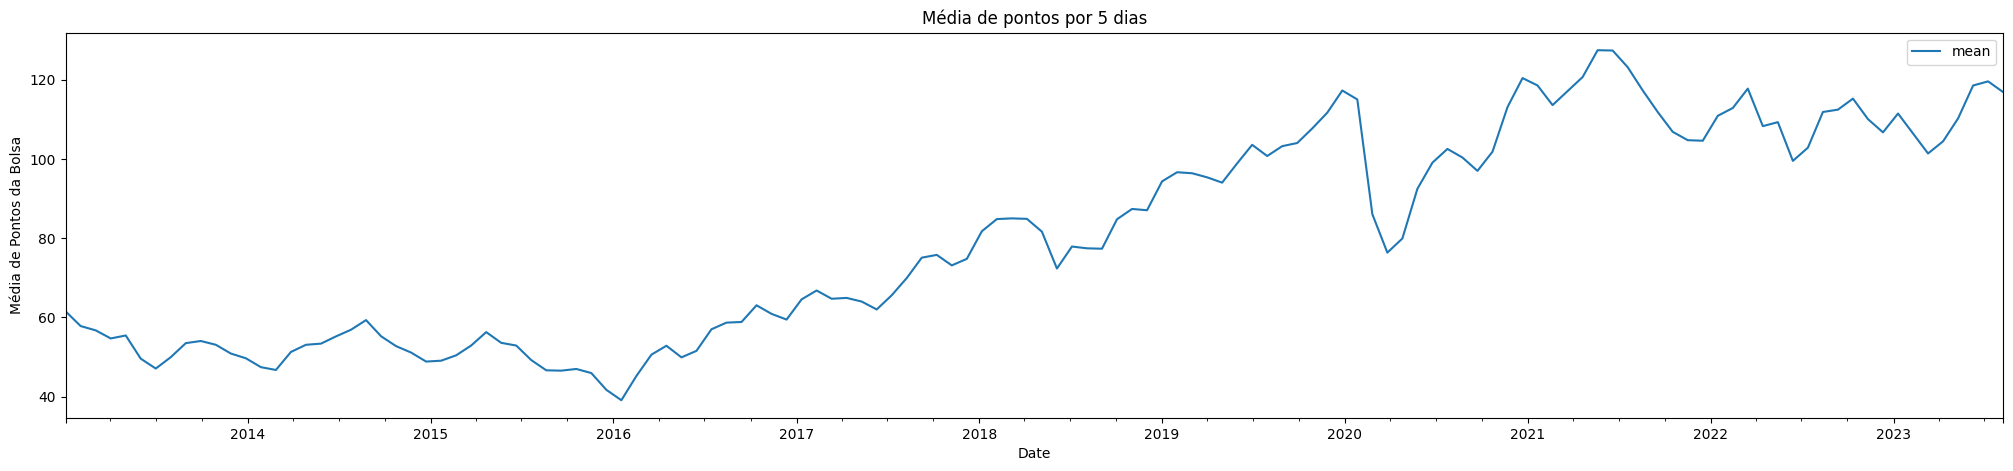

In [667]:
data["fechamento"].resample("30D").apply([np.mean]).plot(figsize=(25, 5))

plt.title("Média de pontos por 5 dias")
plt.ylabel("Média de Pontos da Bolsa")



In [668]:
ibvp = data.groupby('Date')["fechamento"].mean().reset_index()


Text(0.5, 0, 'Mês')

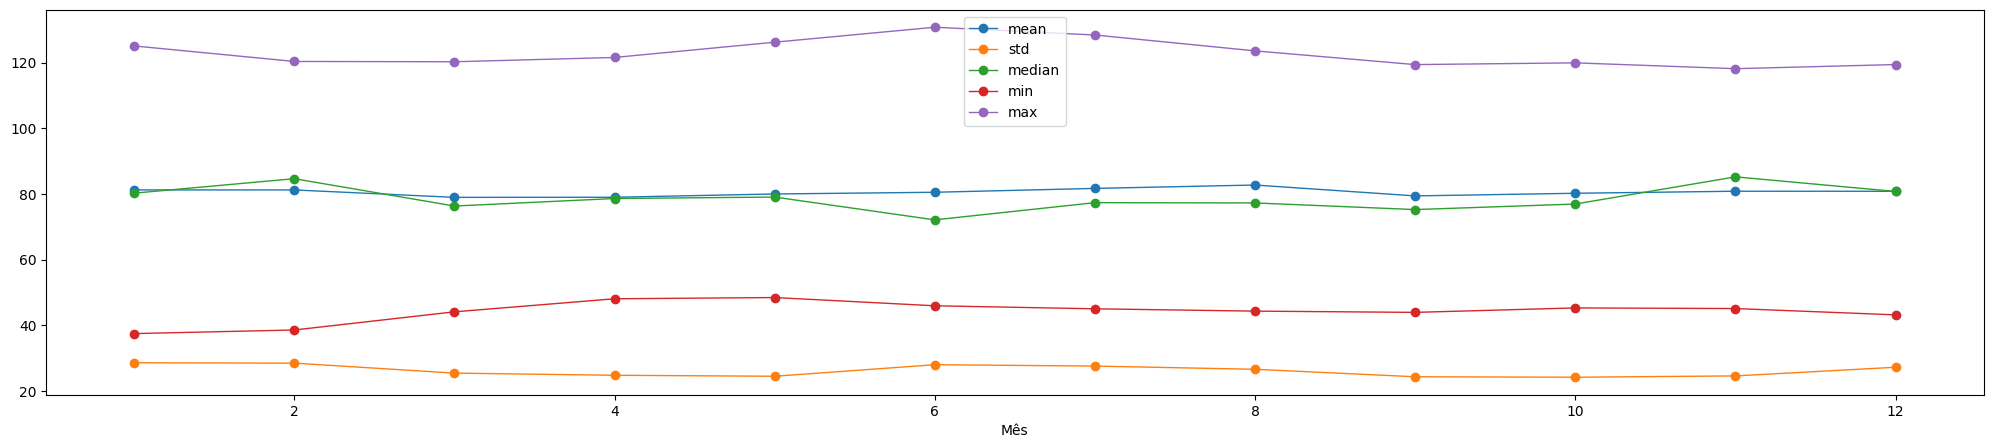

In [669]:
fig, ax = plt.subplots(1, 1, figsize=(25, 5))
(ibvp.set_index('Date')
   .assign(month=lambda df: df.index.month)
   .groupby('month')['fechamento'].agg(["mean", "std", "median", "min", "max"])
   .plot(ax=ax, marker="o",linewidth=1))
ax.set_xlabel('Mês')

<Axes: xlabel='Date'>

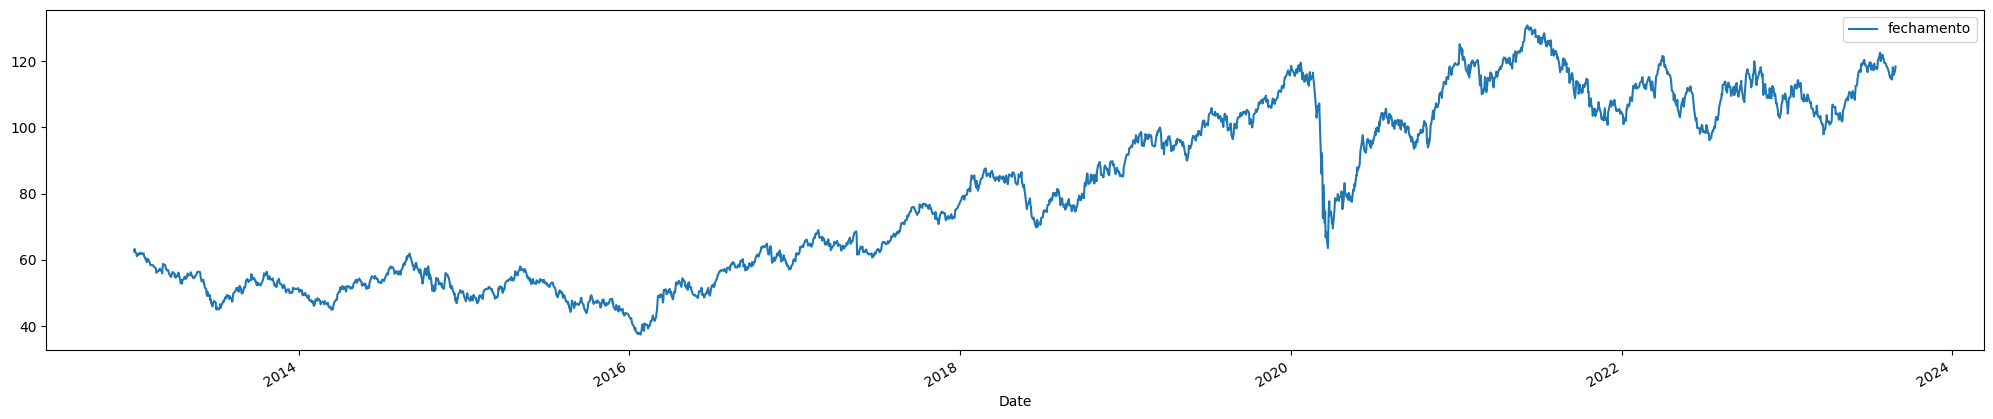

In [670]:
data.plot(figsize=(25, 5))

In [671]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [672]:
result = seasonal_decompose(data1, model='multiplicative')

In [673]:
result1 = seasonal_decompose(data1, model='aditive')

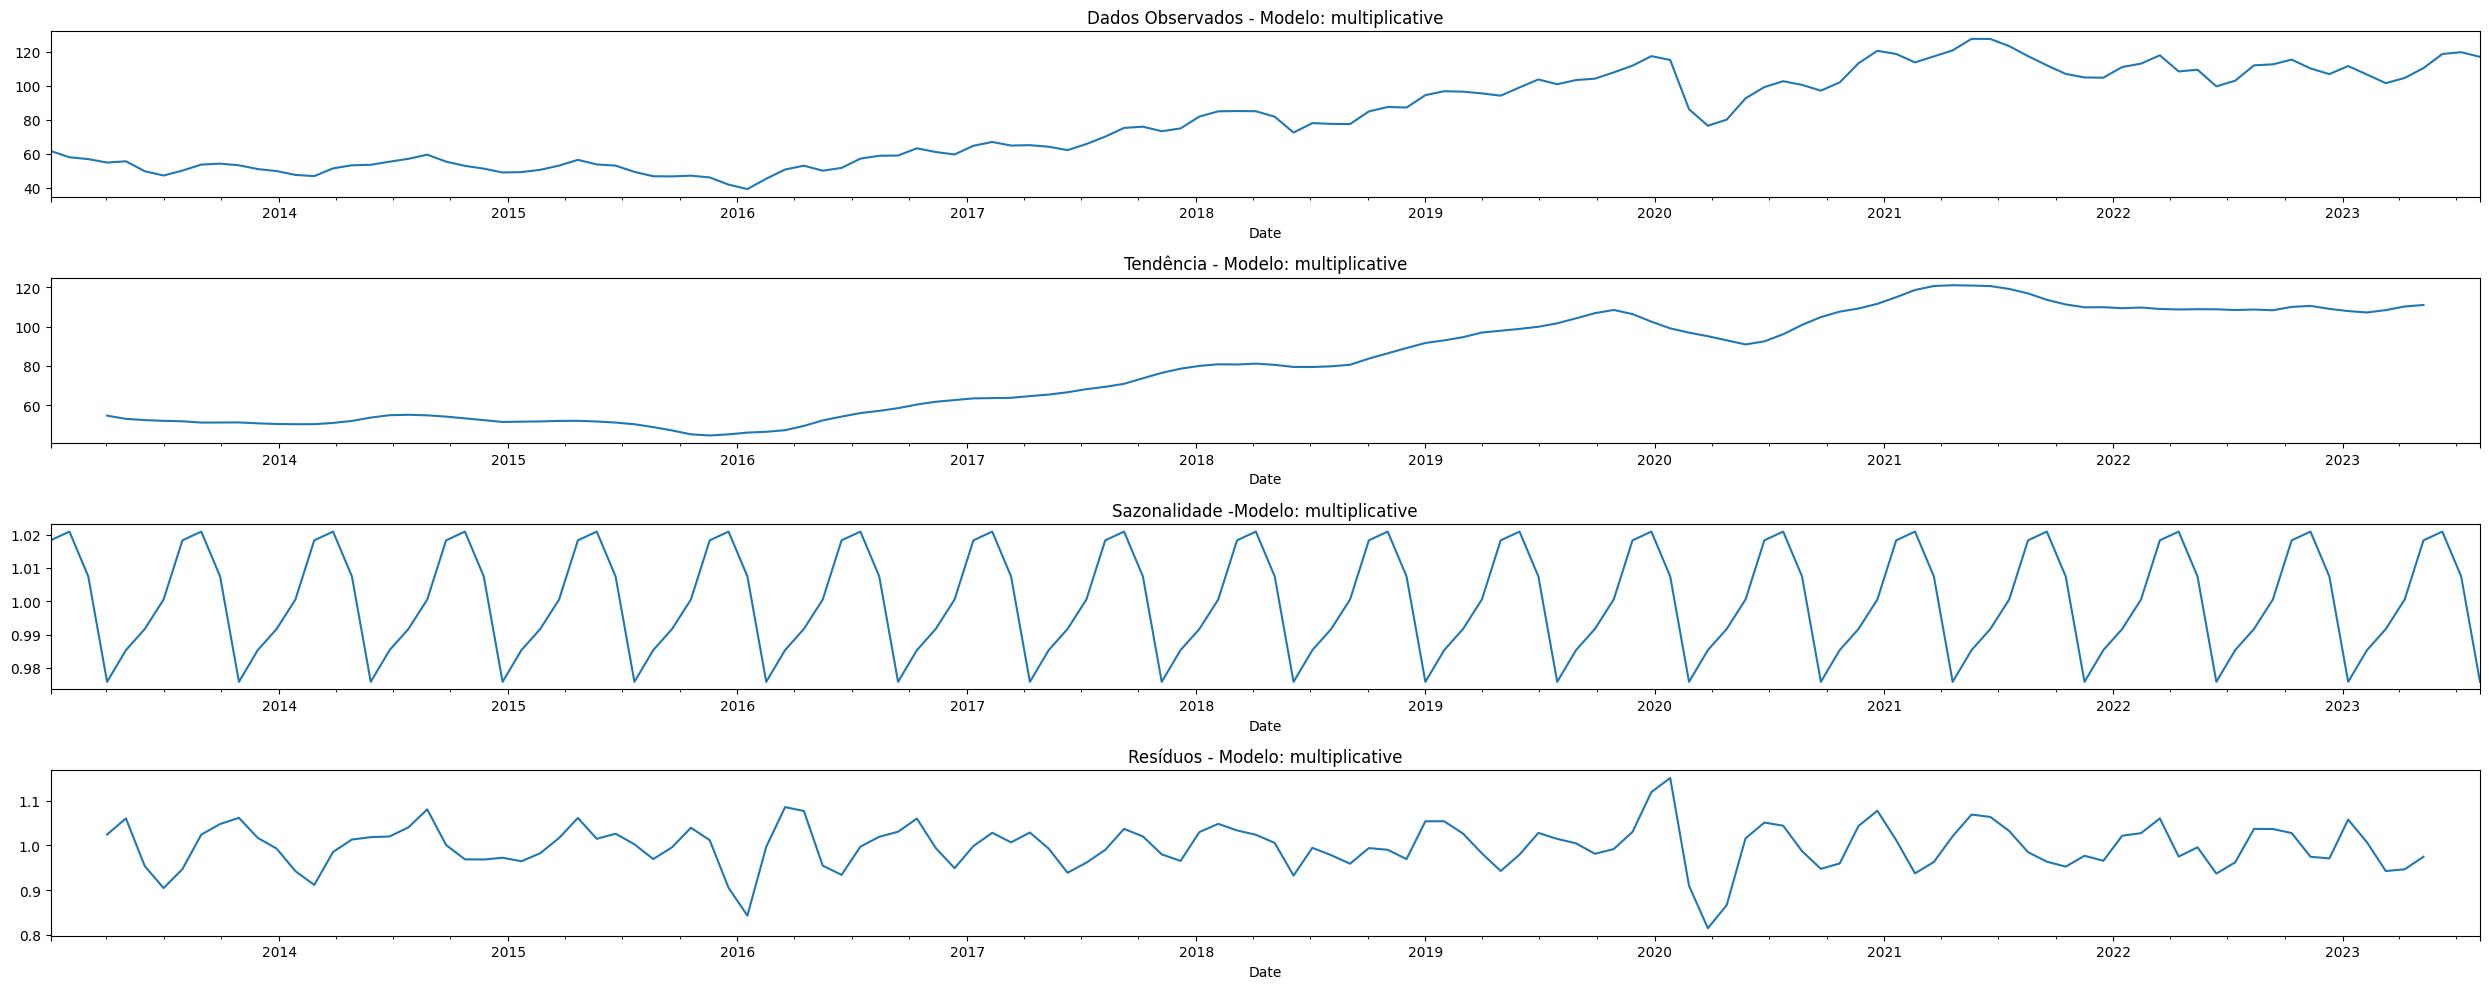

In [674]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(25,10))

result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

ax1.set_title('Dados Observados - Modelo: multiplicative')
ax2.set_title('Tendência - Modelo: multiplicative')
ax3.set_title('Sazonalidade -Modelo: multiplicative')
ax4.set_title('Resíduos - Modelo: multiplicative')

plt.tight_layout()

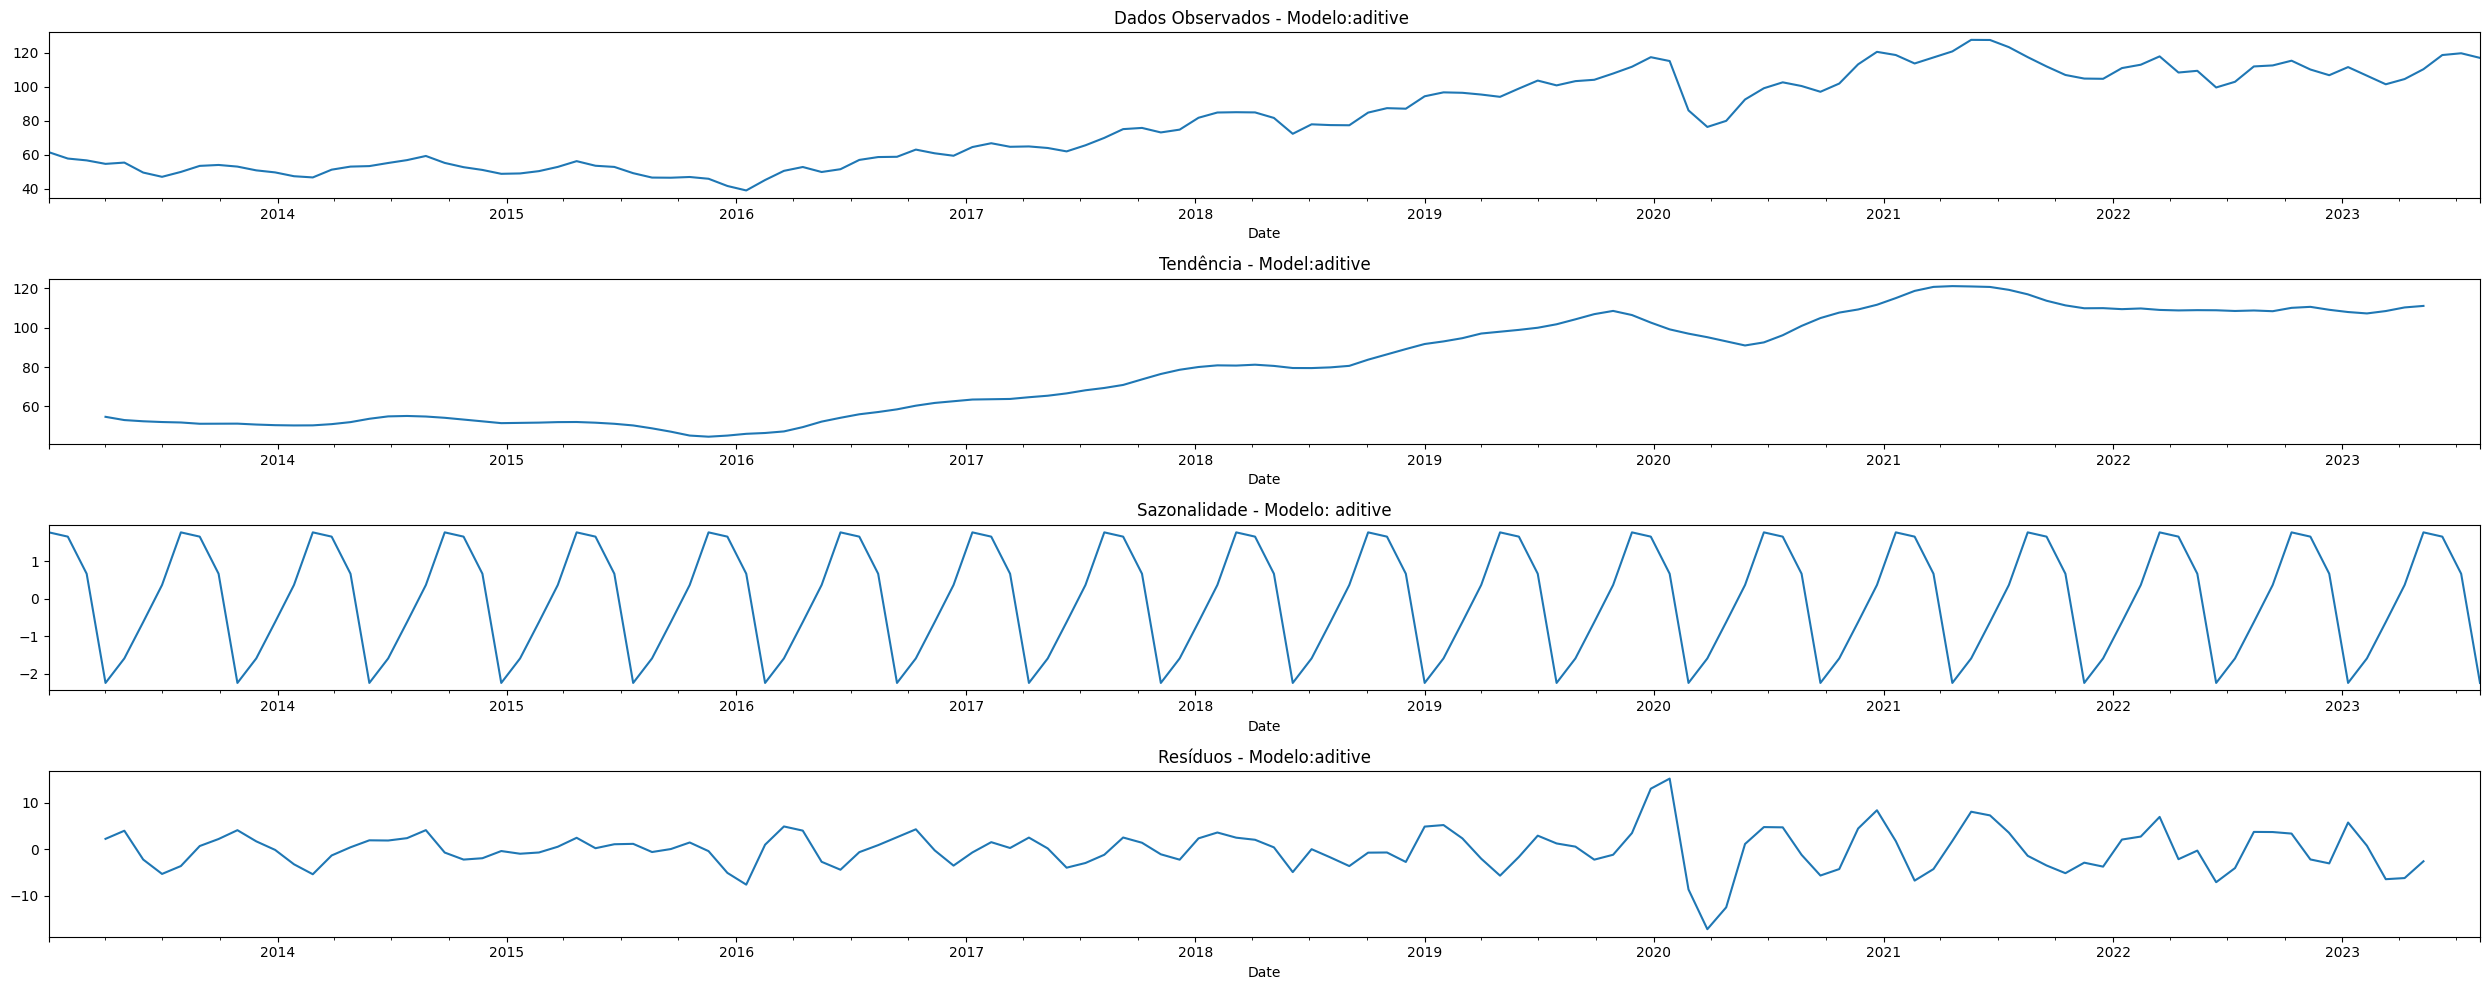

In [675]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(25,10))

result1.observed.plot(ax=ax1)
result1.trend.plot(ax=ax2)
result1.seasonal.plot(ax=ax3)
result1.resid.plot(ax=ax4)

ax1.set_title('Dados Observados - Modelo:aditive ')
ax2.set_title('Tendência - Model:aditive')
ax3.set_title('Sazonalidade - Modelo: aditive')
ax4.set_title('Resíduos - Modelo:aditive')

plt.tight_layout()

SEPARACAO DOS DADOS


In [676]:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()


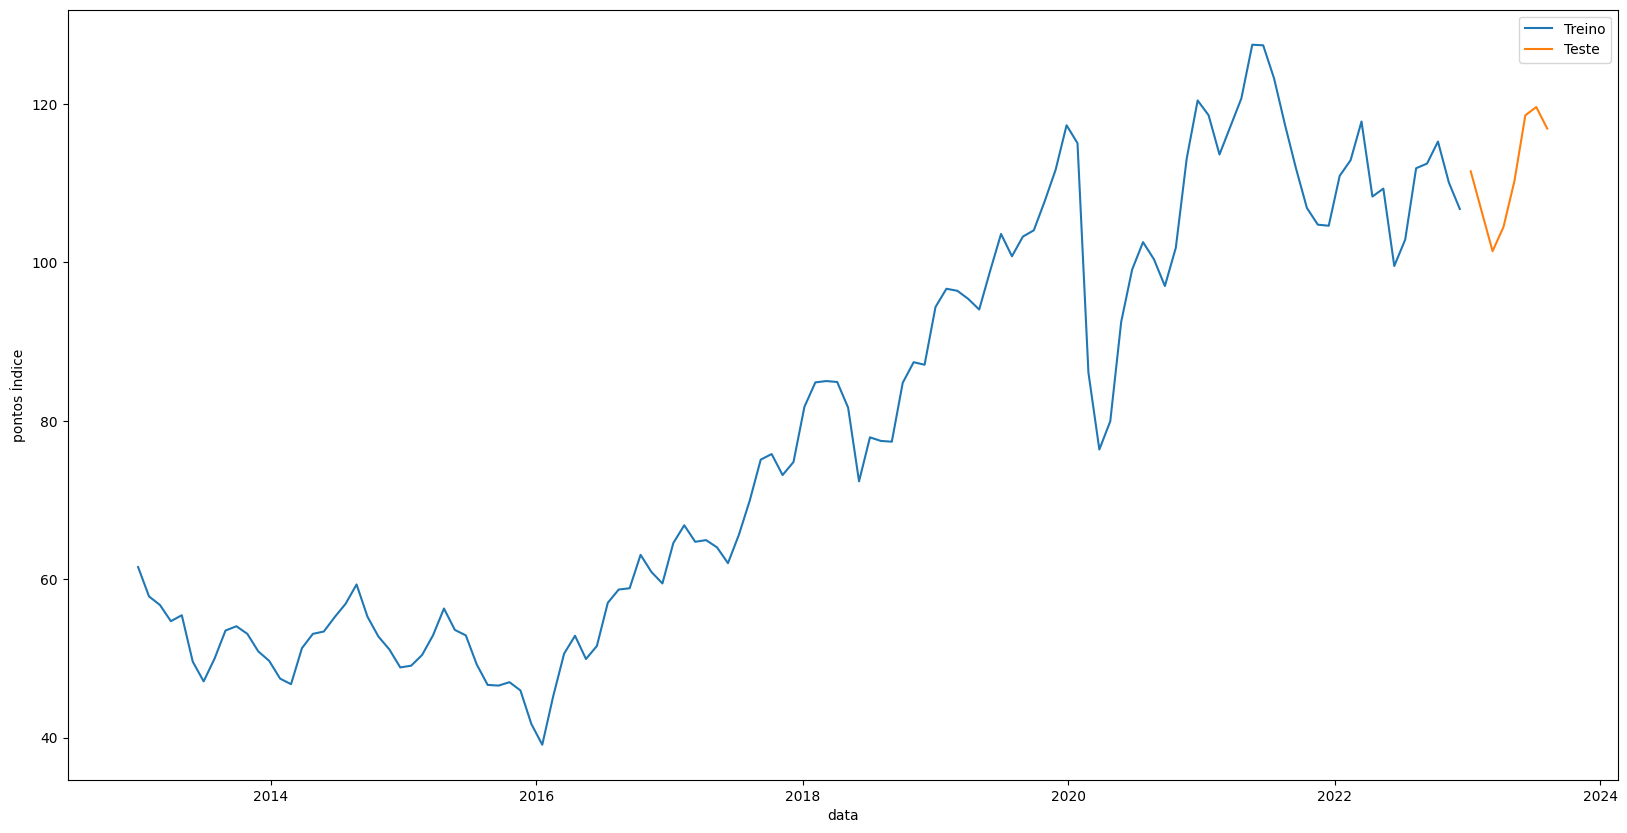

In [677]:

treino, teste = split_data(data1, '2023-01-01')

plt.figure(figsize=(20,10))
plt.xlabel('data')
plt.ylabel('pontos Índice')
plt.plot(treino.index,treino['mean'],label='Treino')
plt.plot(teste.index,teste['mean'],label='Teste')
plt.legend()
plt.show()

#Teste_ADF

In [678]:
from statsmodels.tsa.stattools import adfuller

In [679]:
X = data1['mean']

In [680]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Resutaldo do Teste Dickey-Fuller:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor p', '# de lags', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valores Críticos ({})'.format(key)] = value
    print(dfoutput)

In [681]:
adf_test(X)

Resutaldo do Teste Dickey-Fuller:
Teste                      -0.486401
Valor p                     0.894643
# de lags                   4.000000
# de observações          125.000000
Valores Críticos (1%)      -3.483779
Valores Críticos (5%)      -2.884954
Valores Críticos (10%)     -2.579257
dtype: float64


In [682]:
y_diff = np.diff(X)

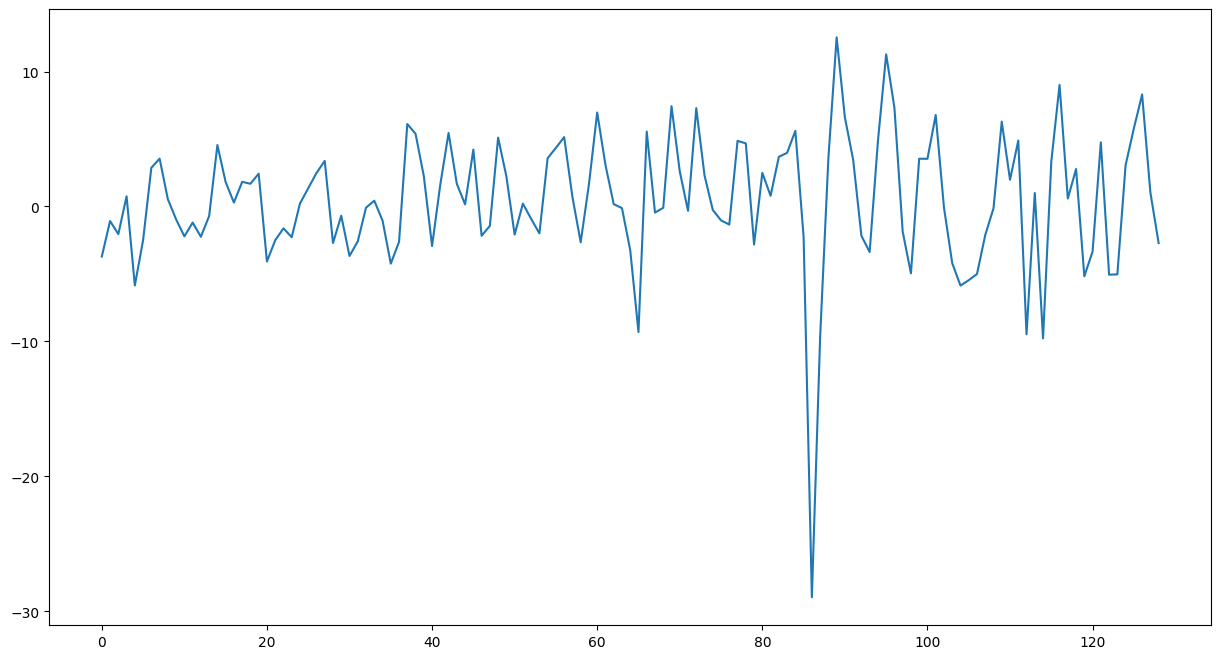

In [683]:
plt.plot(y_diff)

In [684]:
adf_test(y_diff)

Resutaldo do Teste Dickey-Fuller:
Teste                    -7.615086e+00
Valor p                   2.202684e-11
# de lags                 3.000000e+00
# de observações          1.250000e+02
Valores Críticos (1%)    -3.483779e+00
Valores Críticos (5%)    -2.884954e+00
Valores Críticos (10%)   -2.579257e+00
dtype: float64


In [685]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -0.48640080775411326
P-Value: 0.89464307839791
Valores críticos:
	1%: -3.4837793736959997
	5%: -2.88495387648
	10%: -2.579256976


# ACF e PACF

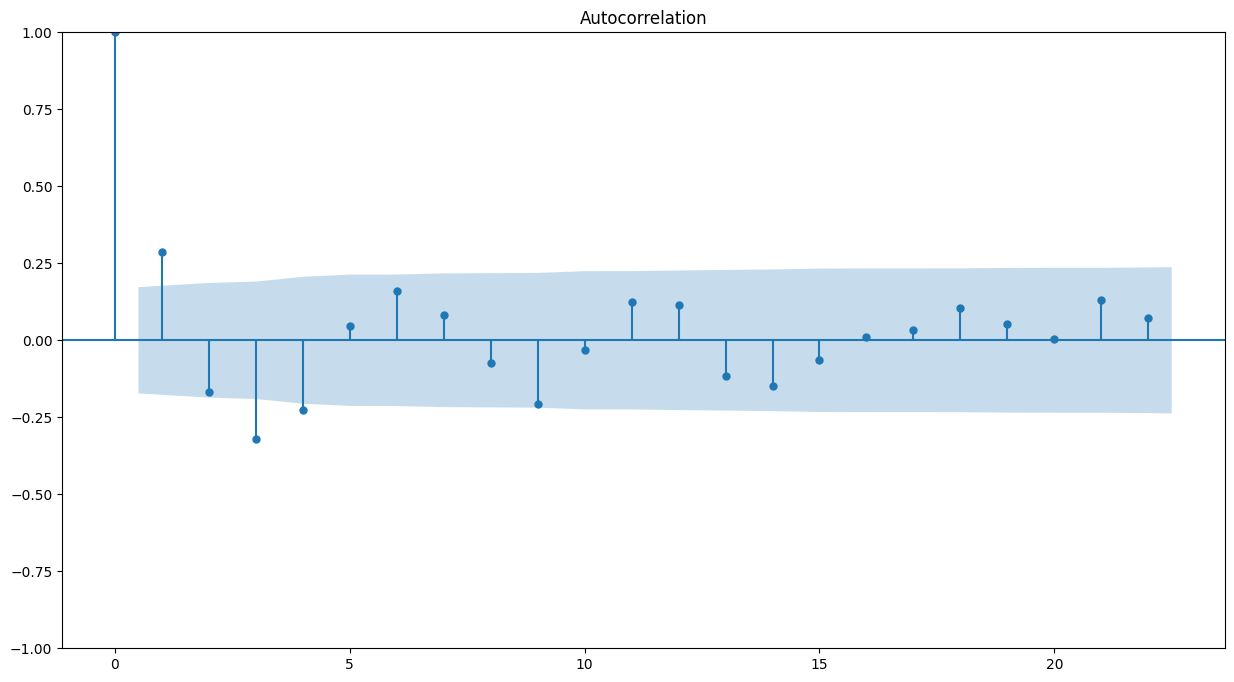

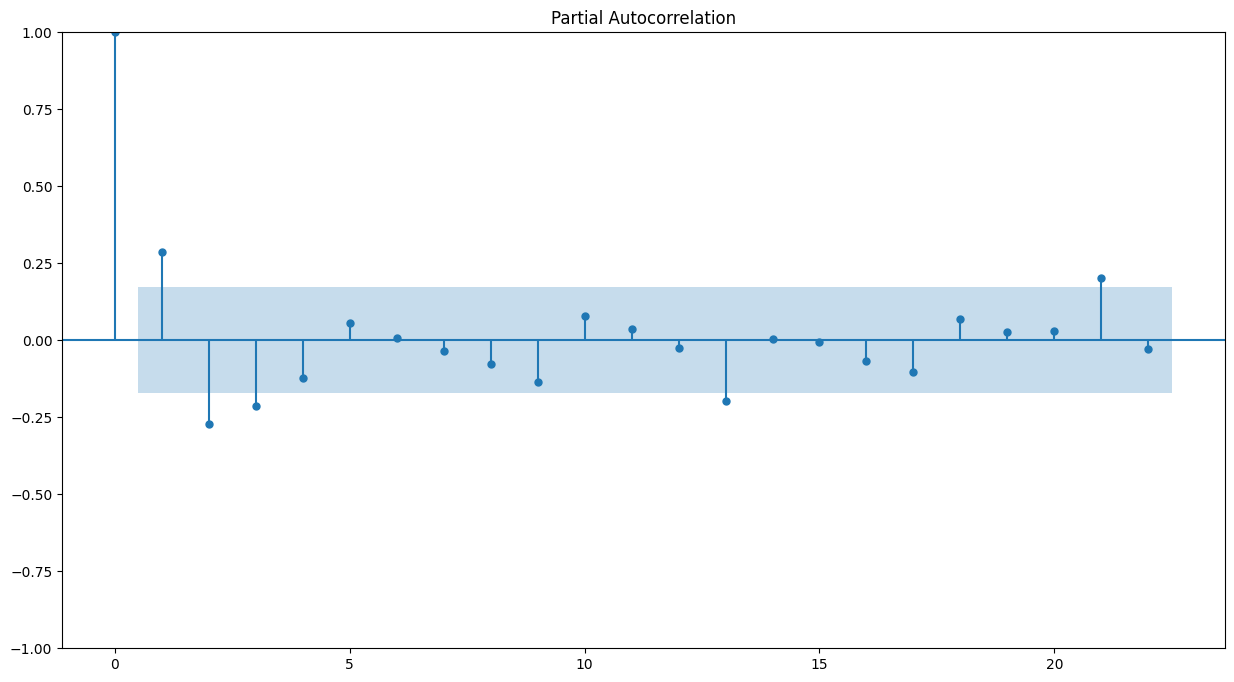

In [686]:
plot_acf(y_diff)
plot_pacf(y_diff)
plt.show()

#Seleção ARIMA

In [687]:
model = auto_arima(train, seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=336.635, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=341.622, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=333.714, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=334.639, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=339.759, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=335.708, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=335.710, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=337.672, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=331.791, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=333.787, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=333.789, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=332.739, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=335.747, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.181 seconds


In [688]:
model.fit(train)


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [689]:
predictions = model.predict(n_periods=len(test))


# Teste WMAPE

In [690]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [691]:
test

Date
2014-08-25     60.417200
2014-08-30     61.624667
2014-09-04     60.225000
2014-09-09     58.035000
2014-09-14     58.636500
                 ...    
2023-08-08    118.478500
2023-08-13    115.888750
2023-08-18    115.331333
2023-08-23    116.999333
2023-08-28    117.762500
Freq: 5D, Name: mean, Length: 659, dtype: float64

In [692]:
wmape1 = wmape(test.values, predictions.values)
print(f'WMAPE: {wmape1:.2f}%')


WMAPE: 0.35%


In [731]:
teste.values.shape[0]

8

In [732]:
predictions.values.shape[0]

659

#ESTACIONALIDADE COM LOG

In [695]:
# df_log = np.log(y_diff)
# ma_log = df_log.rolling(12).mean()
# f, ax = plt.subplots()
# df_log.plot(ax=ax, legend=False)
# ma_log.plot(ax=ax, legend=False, color='r')
# plt.tight_layout()

In [696]:
# df_s = (df_log - ma_log).dropna()

# ma_s = df_s.rolling(12).mean()

# std = df_s.rolling(12).std()

# f, ax = plt.subplots()
# df_s.plot(ax=ax, legend=False)
# ma_s.plot(ax=ax, legend=False, color='r')
# std.plot(ax=ax, legend=False, color='g')
# plt.tight_layout()


# statsmodels.tsa Exponetial Smoothing


In [697]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [698]:
fit1 = ExponentialSmoothing(data1, seasonal_periods=12, trend='additive', seasonal='additive').fit()
fit2 = ExponentialSmoothing(data1, seasonal_periods=12, trend='multiplicative', seasonal='additive').fit()

<Axes: xlabel='Date'>

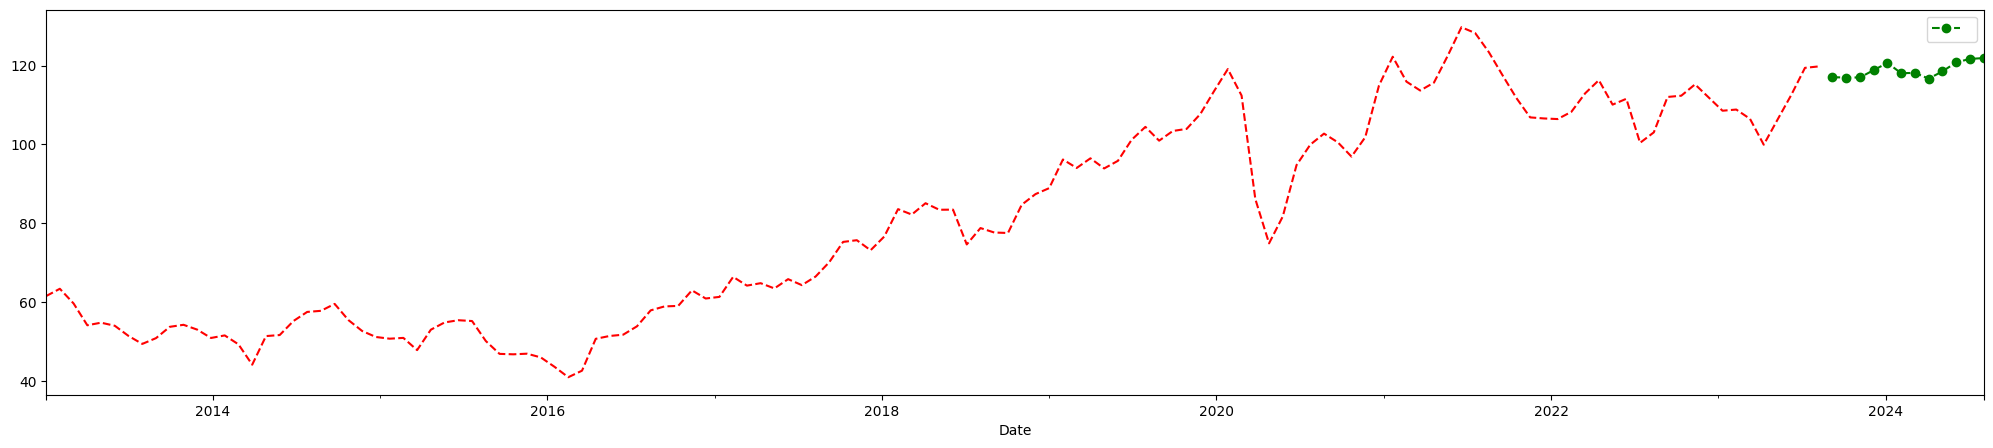

In [699]:
fit1.fittedvalues.plot(style='--', color='red', figsize=(25, 5))
fit1.forecast(12).plot(style='--', marker='o', color='green', legend=True, figsize=(25, 5))

<Axes: >

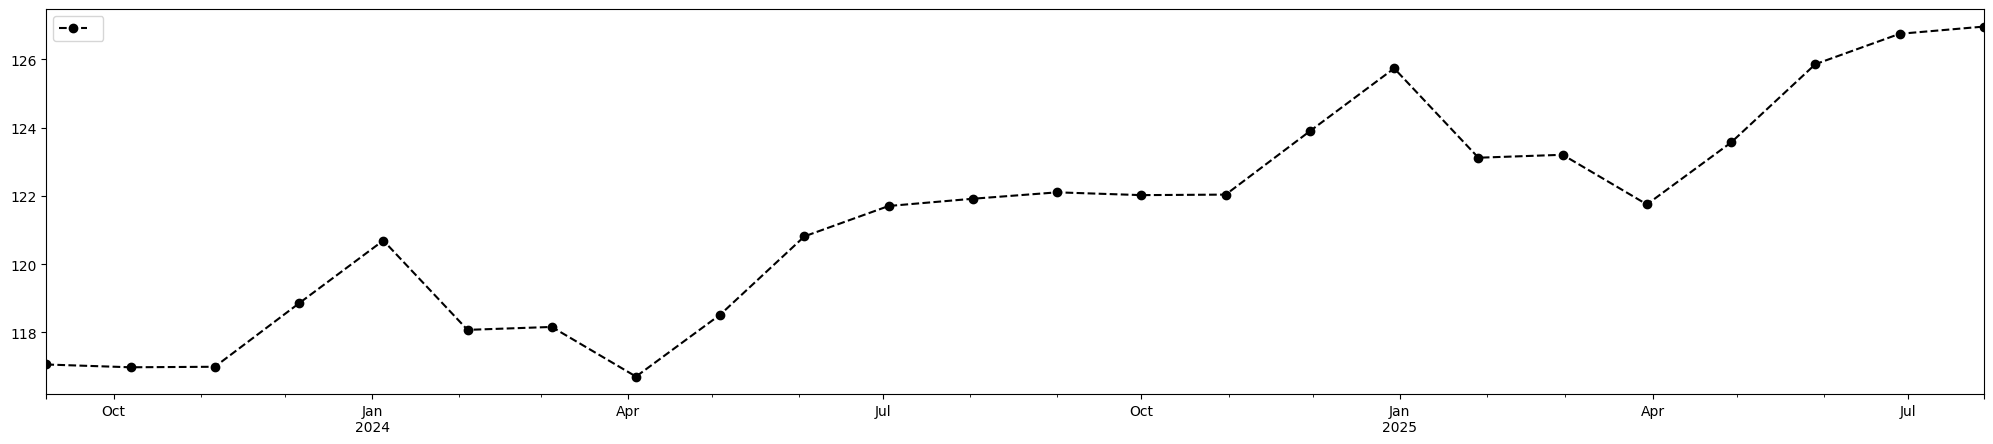

In [700]:
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True, figsize=(25, 5))

<Axes: >

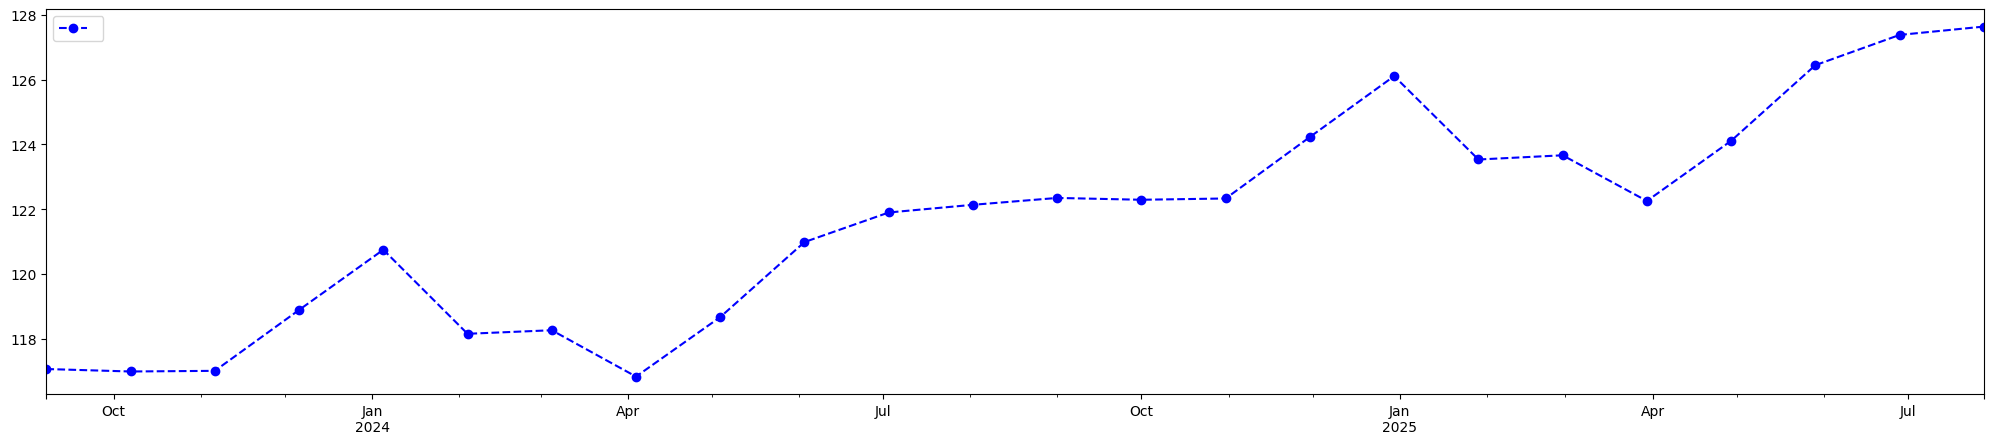

In [701]:
fit2.forecast(24).plot(style='--', marker='o', color='blue', legend=True, figsize=(25, 5))

In [702]:
def weighted_mape(y_true, y_pred):
    weights = np.arange(1, len(y_true) + 1)
    return np.sum(weights * np.abs(y_true - y_pred) / np.sum(weights)) * 100


In [703]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

In [704]:
print("MODELO ETS - Aditivo")
predicao_ets_adt=fit1.forecast(13)
print(predicao_ets_adt)
print ("\n")
print("MODELO ETS - Multiplicativo")
predicao_ets_mult=fit2.forecast(13)
print(predicao_ets_mult)

MODELO ETS - Aditivo
2023-09-07    117.061357
2023-10-07    116.979923
2023-11-06    116.994943
2023-12-06    118.853447
2024-01-05    120.691519
2024-02-04    118.075181
2024-03-05    118.161026
2024-04-04    116.707628
2024-05-04    118.521865
2024-06-03    120.813872
2024-07-03    121.702669
2024-08-02    121.914677
2024-09-01    122.101909
Freq: 30D, dtype: float64


MODELO ETS - Multiplicativo
2023-09-07    117.066414
2023-10-07    116.990418
2023-11-06    117.010309
2023-12-06    118.888903
2024-01-05    120.747134
2024-02-04    118.153522
2024-03-05    118.263211
2024-04-04    116.833268
2024-05-04    118.669481
2024-06-03    120.984133
2024-07-03    121.897139
2024-08-02    122.134131
2024-09-01    122.345991
Freq: 30D, dtype: float64


## PREVISÃO ARIMA

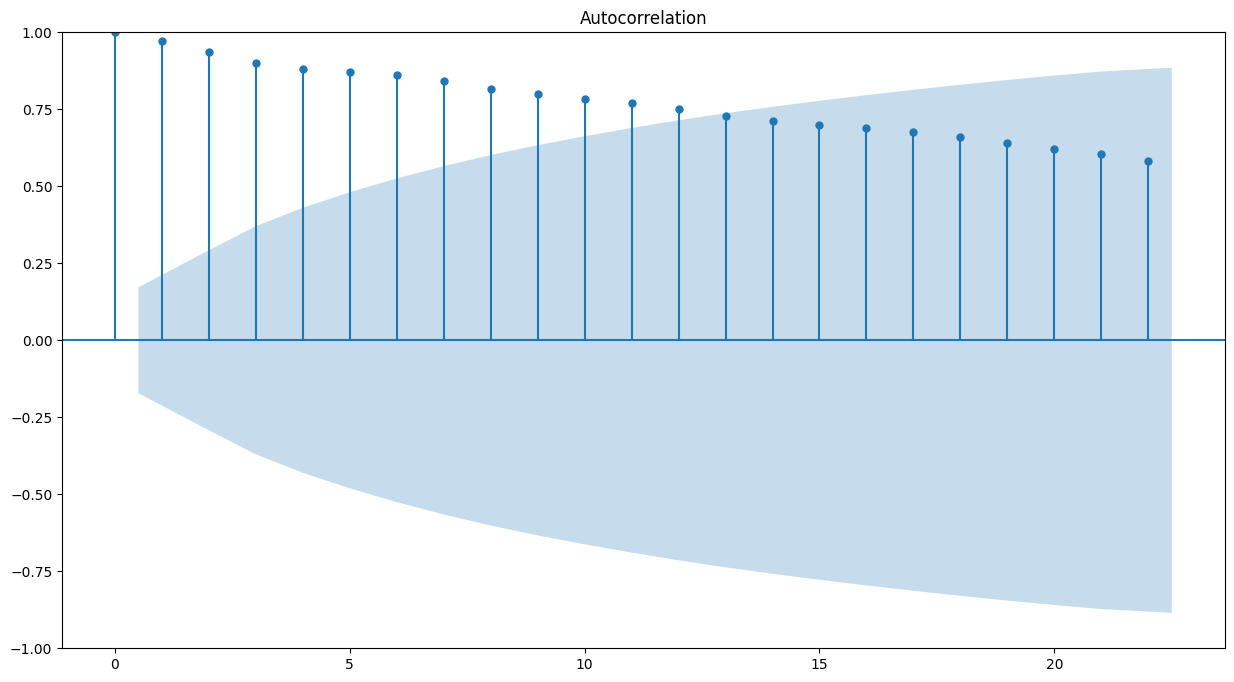

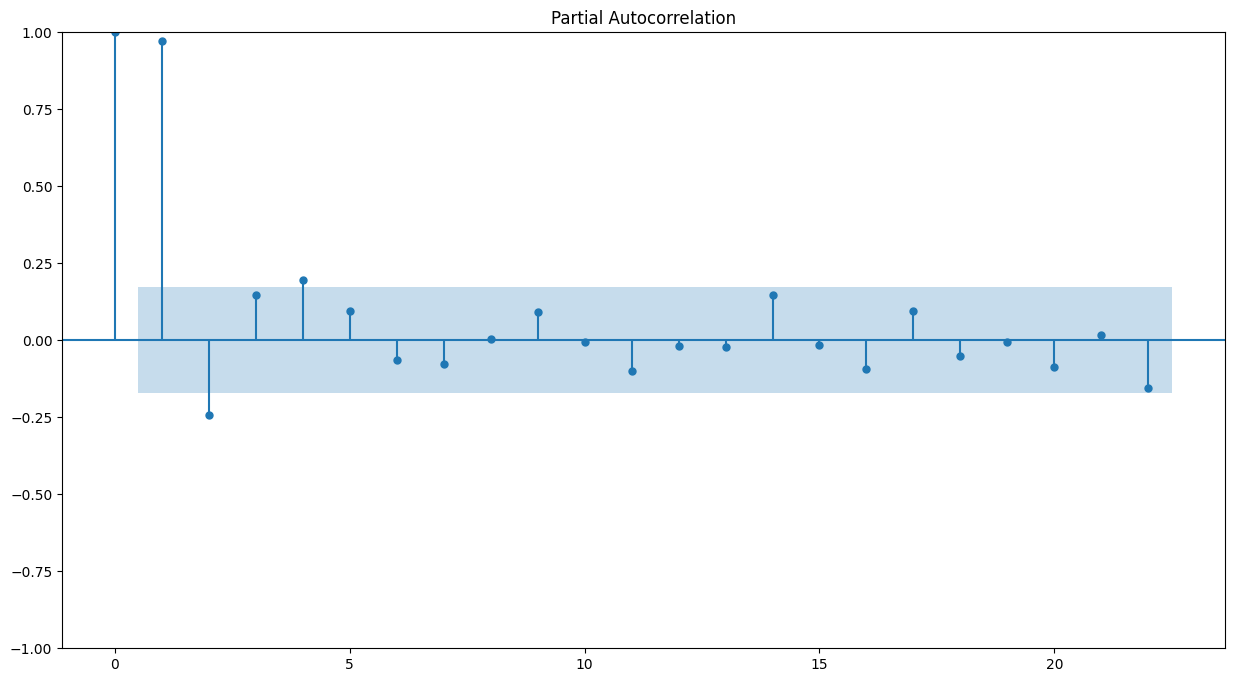

In [705]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data1)
plot_pacf(data1)
plt.show()

#ARIMA


In [706]:
from statsmodels.tsa.arima_model import ARIMA

In [707]:
def weighted_mape(y_true, y_pred):
    weights = np.arange(1, len(y_true) + 1)
    return np.sum(weights * np.abs(y_true - y_pred) / np.sum(weights))*100



## Previsão Automatizada com o Sarimax


In [708]:
from pmdarima.arima import auto_arima

In [709]:
stepwise_model = auto_arima(data1, start_p=1, start_q=1,max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=722.797, Time=0.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=775.624, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=748.354, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=720.803, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=761.103, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=742.365, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=736.306, Time=0.17 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=722.786, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=725.745, Time=0.25 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=718.972, Time=0.57 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=inf, T

In [710]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -352.414
Date:                            Mon, 04 Sep 2023   AIC                            714.829
Time:                                    03:38:51   BIC                            728.640
Sample:                                01-02-2013   HQIC                           720.436
                                     - 08-08-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8965      0.207      4.325      0.000       0.490       1.303
ar.L2         -0.4516      0.105     -4.281      0.000      -0.658      -0.245
ma.L1         -0.5513      0.213     -2.593      0.010      -0.968      -0.135
ma.S.L12      -0.8646      0.130     -6.651      0.000      -1.119      -0.610
sigma2        21.0314      2.040     10.312      0.000      17.034      25.029
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               421.05
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               3.26   Skew:                            -1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [711]:
print(stepwise_model.aic())

714.8286365991263


In [712]:
stepwise_model.fit(data1)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [713]:
future_forecast = stepwise_model.predict(n_periods=13)

In [714]:
print(future_forecast)

2023-09-07    114.254479
2023-10-07    113.765157
2023-11-06    114.320073
2023-12-06    117.095348
2024-01-05    119.702603
2024-02-04    116.326060
2024-03-05    115.939059
2024-04-04    114.573779
2024-05-04    117.059172
2024-06-03    119.224293
2024-07-03    120.069186
2024-08-02    120.418481
2024-09-01    120.099254
Freq: 30D, dtype: float64


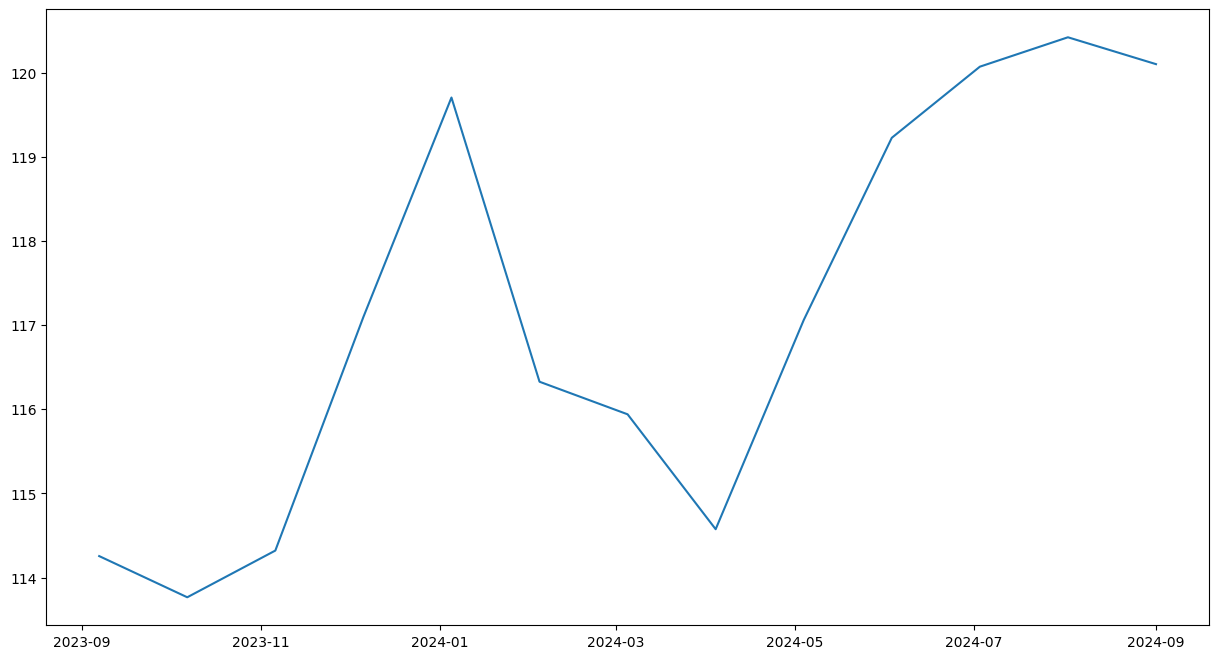

In [715]:
plt.plot(future_forecast)

In [716]:
future_forecast = pd.DataFrame(future_forecast,columns=["mean"])

In [717]:
pd.concat([future_forecast],axis=1)

,mean
2023-09-07,114.254479
2023-10-07,113.765157
2023-11-06,114.320073
2023-12-06,117.095348
2024-01-05,119.702603
2024-02-04,116.326060
2024-03-05,115.939059
2024-04-04,114.573779
2024-05-04,117.059172
2024-06-03,119.224293


<Axes: >

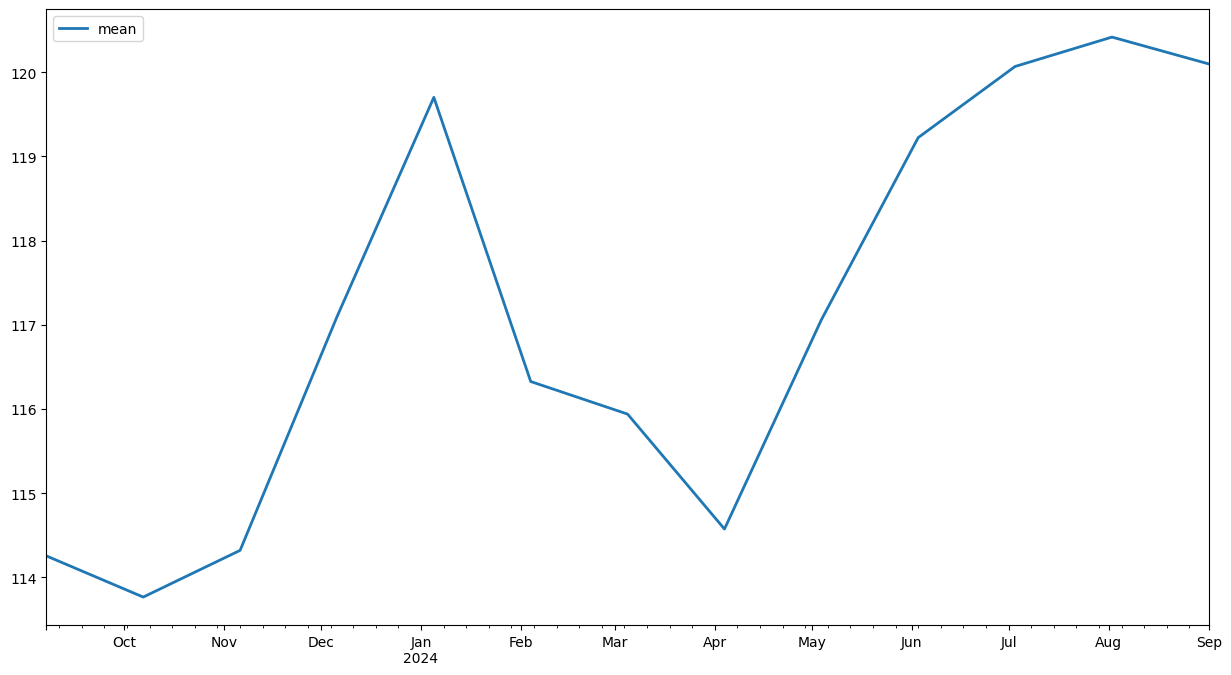

In [718]:
pd.concat([future_forecast],axis=1).plot(linewidth=2)

In [719]:
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['fechamento'].values
X.head()

,ds,y
0,2013-01-02,62.550
1,2013-01-03,63.312
2,2013-01-04,62.523
3,2013-01-07,61.933
4,2013-01-08,61.128


In [720]:
import pmdarima as pm

train, test = y[:120], y[120:]

# Fit an ARIMA
arima = pm.ARIMA(order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))
arima.fit(y)

ARIMA(order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))

In [721]:
arima.update(test)  # pretend these are the new ones

ARIMA(order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))

In [722]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1438
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3301.702
Date:                              Mon, 04 Sep 2023   AIC                           6615.404
Time:                                      03:39:09   BIC                           6646.976
Sample:                                           0   HQIC                          6627.196
                                             - 1438                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.001      0.186      0.852      -0.002       0.002
ar.L1          0.6424      0.205      3.139      0.002       0.241       1.043
ma.L1         -0.5322      0.207     -2.575      0.010      -0.937      -0.127
ma.L2         -0.0125      0.036     -0.344      0.731      -0.084       0.059
ma.S.L12      -0.9942      0.038    -26.118      0.000      -1.069      -0.920
sigma2         5.8175      0.188     30.982      0.000       5.450       6.186
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3109081.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.45   Skew:                            -9.88
Prob(H) (two-sided):                  0.00   Kurtosis:                       230.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# PLOTRSSS

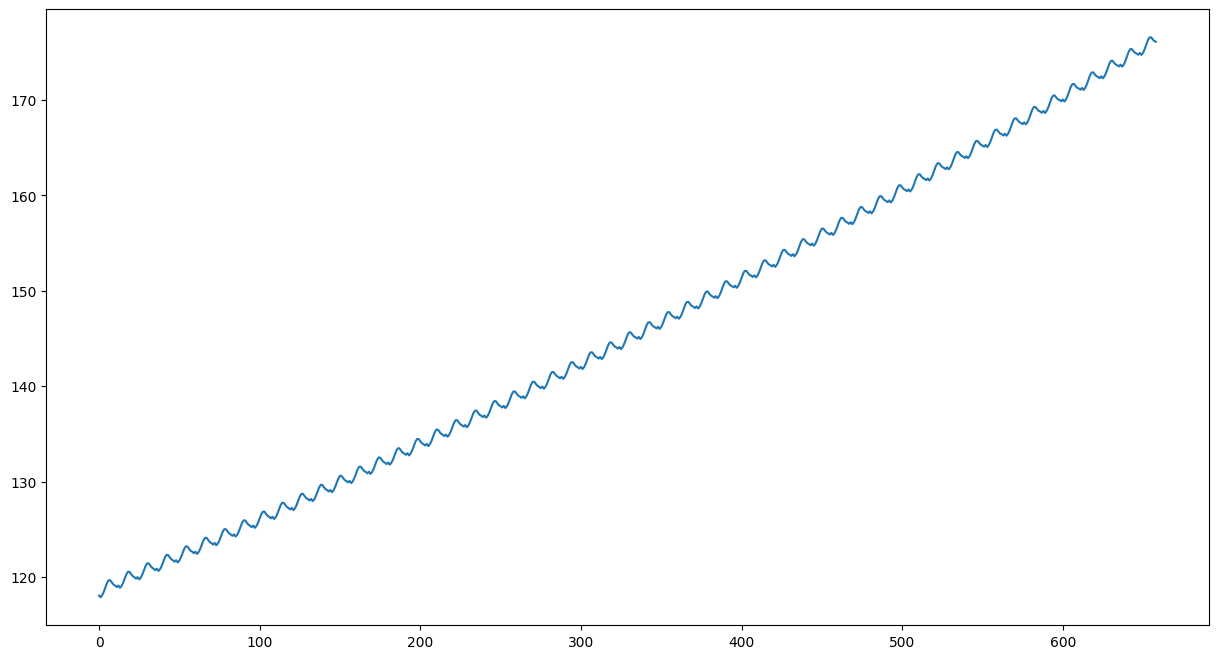

In [723]:
plt.plot(rss)

In [734]:
rss = pd.DataFrame(rss,columns=["Bovespa"])

In [735]:
pd.concat([rss],axis=1)

,Bovespa
0,118.043510
1,117.871357
2,118.107172
3,118.478304
4,118.922001
...,...
654,176.555128
655,176.574662
656,176.361518
657,176.181518


# Teste WMAPE_RSS

In [726]:
rss = arima.predict(test.shape[0])#quantidade de predicoes para teste WMAPE

rss

array([118.04350958, 117.87135694, 118.10717218, 118.47830362,
       118.92200104, 119.38846938, 119.66066217, 119.65448845,
       119.41389601, 119.2053298 , 119.10037965, 118.94797173,
       119.10616564, 118.86564573, 119.05774522, 119.40099673,
       119.82698693, 120.28228288, 120.54750116, 120.53704959,
       120.29391161, 120.08391265, 119.97824462, 119.82557802,
       119.98380825, 119.74351415, 119.93596118, 120.27963843,
       120.70610461, 121.16190881, 121.42765606, 121.41774679,
       121.17515965, 120.96571703, 120.86060887, 120.70850441,
       120.86729824, 120.62756867, 120.82058084, 121.16482361,
       121.59185555, 122.04822568, 122.31453896, 122.30519578,
       122.06317478, 121.85429833, 121.74975635, 121.59821808,
       121.7575781 , 121.51841474, 121.71199312, 122.0568021 ,
       122.48440025, 122.94133659, 123.20821608, 123.19943911,
       122.95798432, 122.74967409, 122.64569832, 122.49472627,
       122.6546525 , 122.41605535, 122.61019994, 122.95

In [727]:
wmape_rss = wmape(test.values,rss)

print(f'WMAPE: {wmape_rss:.2f}%')

WMAPE: 0.70%


# TESTE WMAPE_fit1_forecast

In [728]:
rss = arima.predict(test.shape[0])#quantidade de predicoes para teste WMAPE

rss.shape[0]

659

In [729]:
wmape_rss = wmape(test.values,rss)

print(f'WMAPE: {wmape_rss:.2f}%')

WMAPE: 0.70%


In [730]:
print("MODELO ETS - Aditivo")
print(fit1.forecast(13))
print ("\n")
print("MODELO ETS - Multiplicativo")
print(fit2.forecast(13))
print("\n")
print("Modelo Sarima Automatizado")
print(future_forecast)
print("\n")
print("Modelo Arima")
print(rss)

MODELO ETS - Aditivo
2023-09-07    117.061357
2023-10-07    116.979923
2023-11-06    116.994943
2023-12-06    118.853447
2024-01-05    120.691519
2024-02-04    118.075181
2024-03-05    118.161026
2024-04-04    116.707628
2024-05-04    118.521865
2024-06-03    120.813872
2024-07-03    121.702669
2024-08-02    121.914677
2024-09-01    122.101909
Freq: 30D, dtype: float64


MODELO ETS - Multiplicativo
2023-09-07    117.066414
2023-10-07    116.990418
2023-11-06    117.010309
2023-12-06    118.888903
2024-01-05    120.747134
2024-02-04    118.153522
2024-03-05    118.263211
2024-04-04    116.833268
2024-05-04    118.669481
2024-06-03    120.984133
2024-07-03    121.897139
2024-08-02    122.134131
2024-09-01    122.345991
Freq: 30D, dtype: float64


Modelo Sarima Automatizado
                  mean
2023-09-07  114.254479
2023-10-07  113.765157
2023-11-06  114.320073
2023-12-06  117.095348
2024-01-05  119.702603
2024-02-04  116.326060
2024-03-05  115.939059
2024-04-04  114.573779
2024-05-04 